In [47]:
import pandas as pd

In [48]:
df = pd.read_excel("data/IPH_robos_2021_2024_tecmty.xlsx")
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE
0,3196367,2024-01-01 00:00:00,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12
1,3196186,2024-01-01 00:00:00,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15
2,3196158,2024-01-01 00:00:00,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35
3,3195958,2024-01-01 00:00:00,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77
4,3195921,2024-01-01 00:00:00,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57


In [49]:
df.dtypes

FOLIO          int64
FECHA         object
HORA           int64
MINUTO         int64
TIPO          object
VIOLENCIA     object
LATITUD      float64
LONGITUD     float64
DISTRITO      object
CUADRANTE      int64
dtype: object

In [50]:
df.isnull().sum()

FOLIO        0
FECHA        0
HORA         0
MINUTO       0
TIPO         0
VIOLENCIA    0
LATITUD      0
LONGITUD     0
DISTRITO     0
CUADRANTE    0
dtype: int64

In [51]:
# Convertir la columna 'FECHA' a tipo datetime
df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')

In [52]:
df.dtypes

FOLIO                 int64
FECHA        datetime64[ns]
HORA                  int64
MINUTO                int64
TIPO                 object
VIOLENCIA            object
LATITUD             float64
LONGITUD            float64
DISTRITO             object
CUADRANTE             int64
dtype: object

In [53]:
df.isnull().sum()

FOLIO           0
FECHA        1197
HORA            0
MINUTO          0
TIPO            0
VIOLENCIA       0
LATITUD         0
LONGITUD        0
DISTRITO        0
CUADRANTE       0
dtype: int64

In [54]:
# Ver los  nulos en la columna FECHA
df[df['FECHA'].isnull()]

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE
3444,2756603,NaT,1,2,ROBO DE VEHICULO,NO,28.650632,-106.058686,Ángel,35
3445,2756723,NaT,6,50,ROBO DE VEHICULO,NO,28.618501,-106.060972,Zapata,75
3446,2756766,NaT,8,45,ROBO A NEGOCIO,NO,28.642651,-106.073942,Ángel,36
3447,2756801,NaT,10,7,ROBO A CASA HABITACION,NO,28.652415,-106.080928,Villa,25
3448,2756820,NaT,10,51,ROBO A NEGOCIO,NO,28.618660,-106.066088,Zapata,75
...,...,...,...,...,...,...,...,...,...,...
10882,1652033,NaT,23,53,ROBO A NEGOCIO,NO,28.729168,-106.113141,Colón,13
10883,1651146,NaT,9,7,ROBO A NEGOCIO,NO,28.734838,-106.131418,Colón,7
10884,1651067,NaT,5,41,ROBO DE VEHICULO,NO,28.676933,-106.004125,Morelos,46
10885,1651099,NaT,7,44,ROBO DE VEHICULO,NO,28.597629,-106.020398,Morelos,55


In [55]:
df.duplicated(subset=['FOLIO']).sum()

np.int64(716)

Hay 716 folios con 0

In [56]:
df['HORA'].describe()

count    11179.000000
mean        16.061902
std         18.610810
min          0.000000
25%          8.000000
50%         12.000000
75%         18.000000
max         99.000000
Name: HORA, dtype: float64

In [57]:
df['MINUTO'].describe()

count    11179.00000
mean        32.13749
std         22.24251
min          0.00000
25%         15.00000
50%         30.00000
75%         46.00000
max         99.00000
Name: MINUTO, dtype: float64

El dato atípico en la hora y minuto es que el máximo es de 99 pero porque no se tiene conocimientos sobre estos delitos en hora y minuto por lo que serían nan

In [58]:
df['TIPO'].unique()

array(['ROBO A CASA HABITACION', 'ROBO DE VEHICULO', 'ROBO A NEGOCIO'],
      dtype=object)

In [59]:
df['VIOLENCIA'].unique()

array(['NO', 'SI'], dtype=object)

In [60]:
df['AÑO'] = pd.DatetimeIndex(df['FECHA']).year
df['MES'] = pd.DatetimeIndex(df['FECHA']).month
df['DIA'] = pd.DatetimeIndex(df['FECHA']).day
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,AÑO,MES,DIA
0,3196367,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12,2024.0,1.0,1.0
1,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,2024.0,1.0,1.0
2,3196158,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35,2024.0,1.0,1.0
3,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,2024.0,1.0,1.0
4,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,2024.0,1.0,1.0


In [61]:
df[df['TIPO'] == 'ROBO A NEGOCIO'].groupby('DISTRITO').size().sort_values(ascending=False)

DISTRITO
Villa      1166
Colón      1004
Morelos     961
Zapata      924
Diana       491
Ángel       412
dtype: int64

In [62]:
df.groupby(['DISTRITO', 'TIPO']).size().unstack(fill_value=0)

TIPO,ROBO A CASA HABITACION,ROBO A NEGOCIO,ROBO DE VEHICULO
DISTRITO,,,
Colón,571,1004,772
Diana,166,491,270
Morelos,1003,961,738
Villa,549,1166,744
Zapata,486,924,571
Ángel,73,412,278


<Axes: xlabel='DISTRITO', ylabel='TOTAL'>

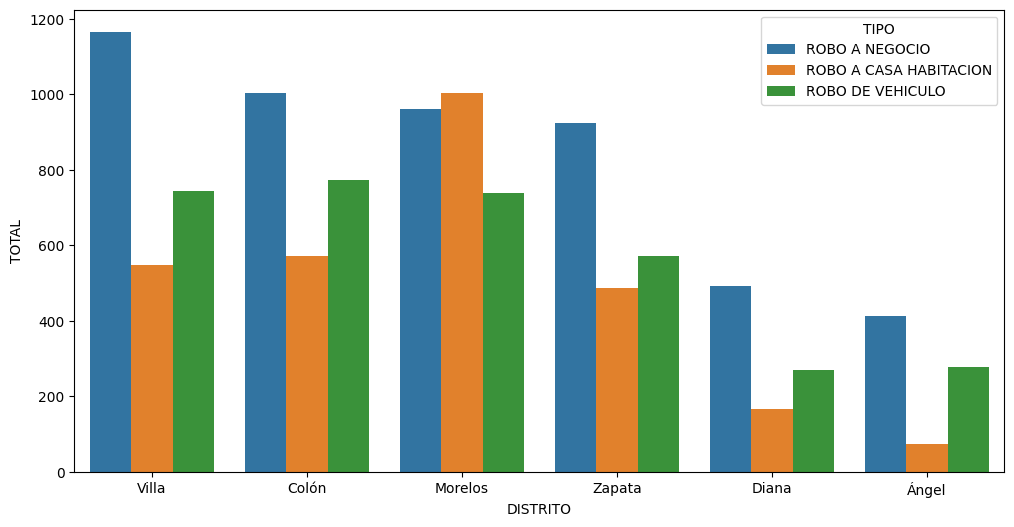

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby(['DISTRITO', 'TIPO']).size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False).head(20), x='DISTRITO', y='TOTAL', hue='TIPO')

Text(0.5, 1.0, 'Total de robos por mes y tipo')

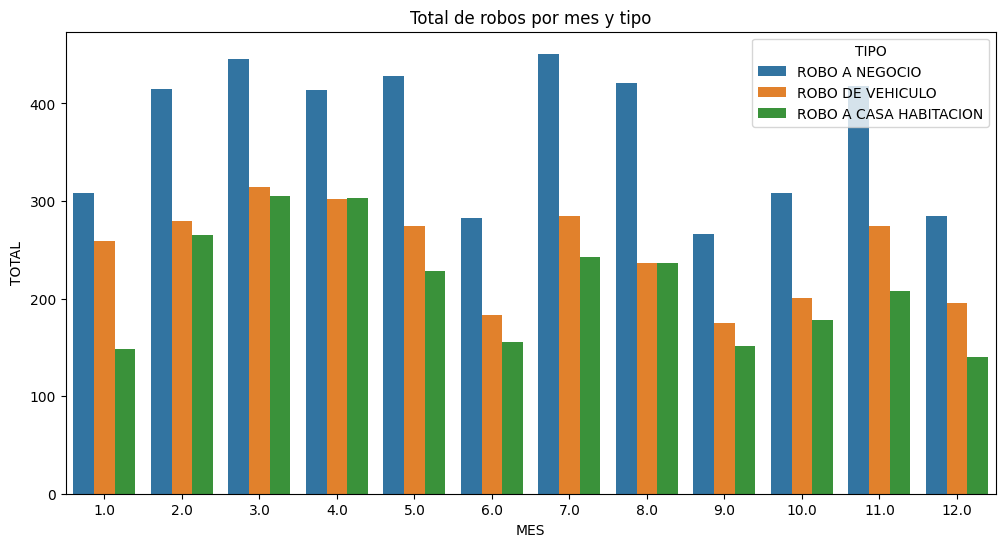

In [64]:
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby(['MES', 'TIPO']).size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False), x='MES', y='TOTAL', hue='TIPO')
plt.title('Total de robos por mes y tipo')

Text(0.5, 1.0, 'Total de robos por hora y tipo')

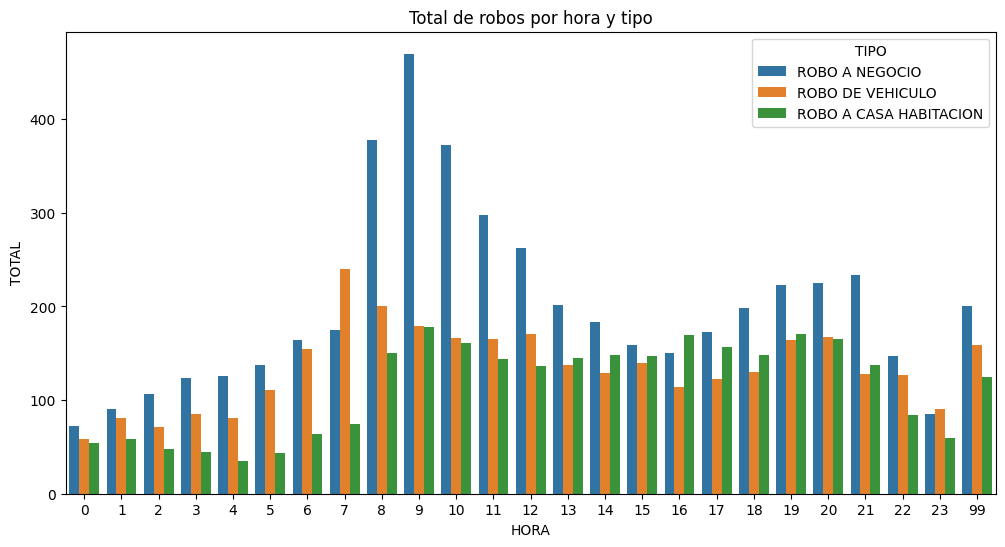

In [65]:
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby(['HORA', 'TIPO']).size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False), x='HORA', y='TOTAL', hue='TIPO')
plt.title('Total de robos por hora y tipo')

In [66]:
df['DIA_DE_LA_SEMANA'] = df['FECHA'].dt.day_name()
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,AÑO,MES,DIA,DIA_DE_LA_SEMANA
0,3196367,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12,2024.0,1.0,1.0,Monday
1,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,2024.0,1.0,1.0,Monday
2,3196158,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35,2024.0,1.0,1.0,Monday
3,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,2024.0,1.0,1.0,Monday
4,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,2024.0,1.0,1.0,Monday


Text(0.5, 1.0, 'Total de robos por hora y tipo')

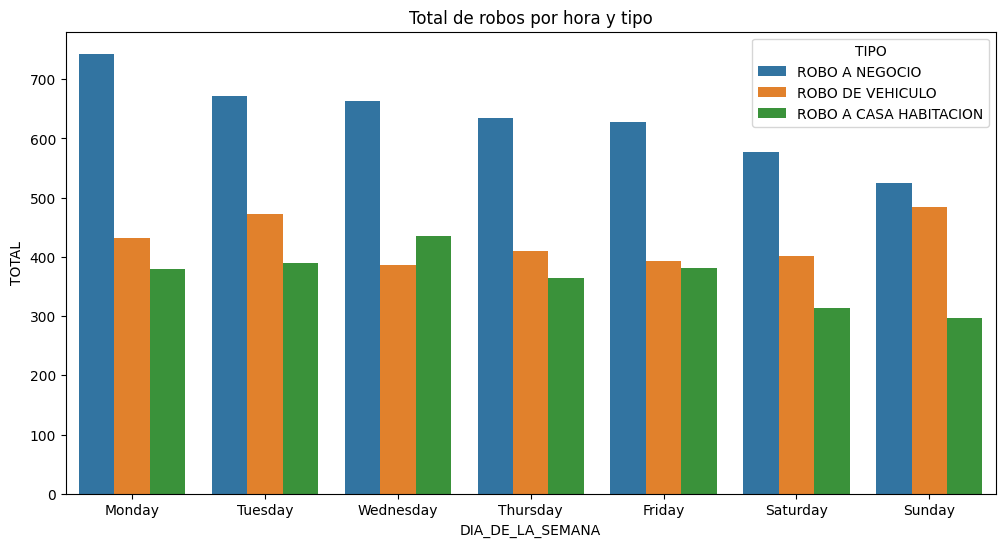

In [67]:
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby(['DIA_DE_LA_SEMANA', 'TIPO']).size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False), x='DIA_DE_LA_SEMANA', y='TOTAL', hue='TIPO')
plt.title('Total de robos por hora y tipo')

In [68]:
# Checar cuántos 99 hay en HORA y MINUTO
df[(df['HORA'] == 99) | (df['MINUTO'] == 99)].shape[0]

485

Text(0.5, 1.0, 'Total de robos por hora y violencia')

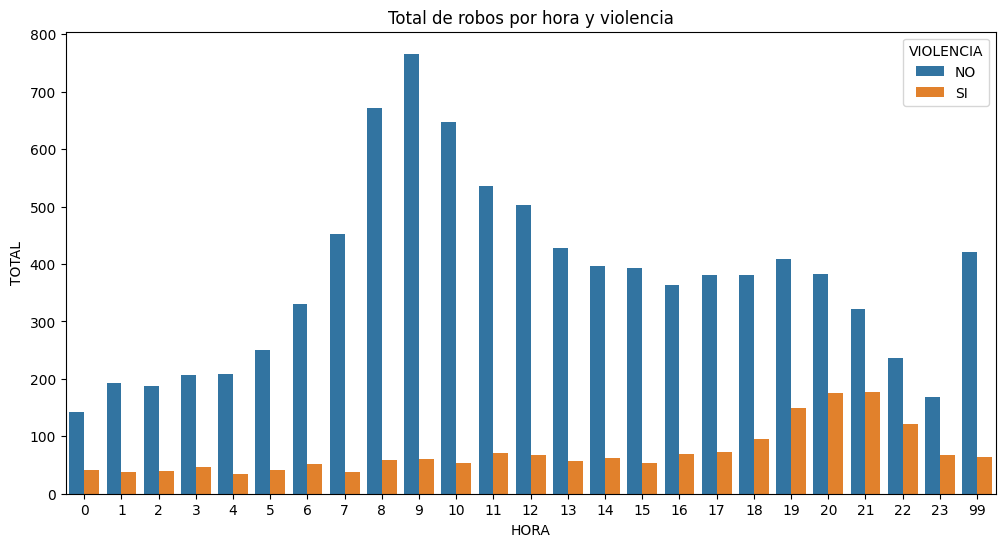

In [69]:
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby(['HORA', 'VIOLENCIA']).size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False), x='HORA', y='TOTAL', hue='VIOLENCIA')
plt.title('Total de robos por hora y violencia')

Text(0.5, 1.0, 'Total de robos a negocios por hora y violencia')

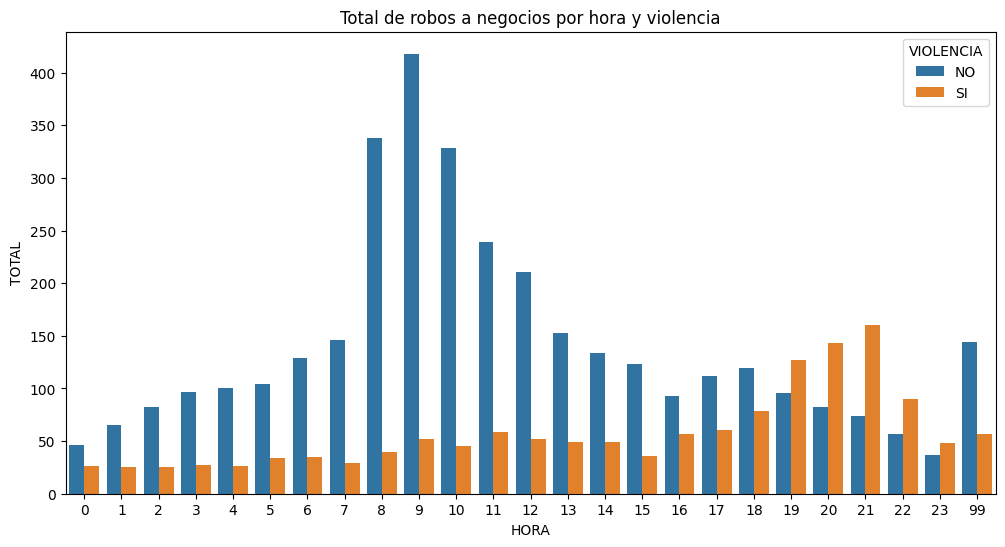

In [70]:
# Total de robos a negoocios por HORA y VIOLENCIA
plt.figure(figsize=(12,6))
sns.barplot(data=df[df['TIPO'] == 'ROBO A NEGOCIO'].groupby(['HORA', 'VIOLENCIA']).size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False), x='HORA', y='TOTAL', hue='VIOLENCIA')
plt.title('Total de robos a negocios por hora y violencia')


In [71]:
# Por la columna hora y minuto, crea 4 franjas de horario; MAÑANA, TARDE, NOCHE, MADRUGADA Y DESCONOCIDO (99)
def franja_horaria(hora):
    if 6 <= hora < 12:
        return 'MAÑANA'
    elif 12 <= hora < 18:
        return 'TARDE'
    elif 18 <= hora < 24:
        return 'NOCHE'
    elif 0 <= hora < 6:
        return 'MADRUGADA'
    else:
        return 'DESCONOCIDO'

In [72]:
# Visualiza las franjas horarias
df['FRANJA_HORARIA'] = df['HORA'].apply(franja_horaria)
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,AÑO,MES,DIA,DIA_DE_LA_SEMANA,FRANJA_HORARIA
0,3196367,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12,2024.0,1.0,1.0,Monday,DESCONOCIDO
1,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,2024.0,1.0,1.0,Monday,DESCONOCIDO
2,3196158,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35,2024.0,1.0,1.0,Monday,DESCONOCIDO
3,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,2024.0,1.0,1.0,Monday,DESCONOCIDO
4,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,2024.0,1.0,1.0,Monday,DESCONOCIDO


Text(0.5, 1.0, 'Total de robos por franja horaria')

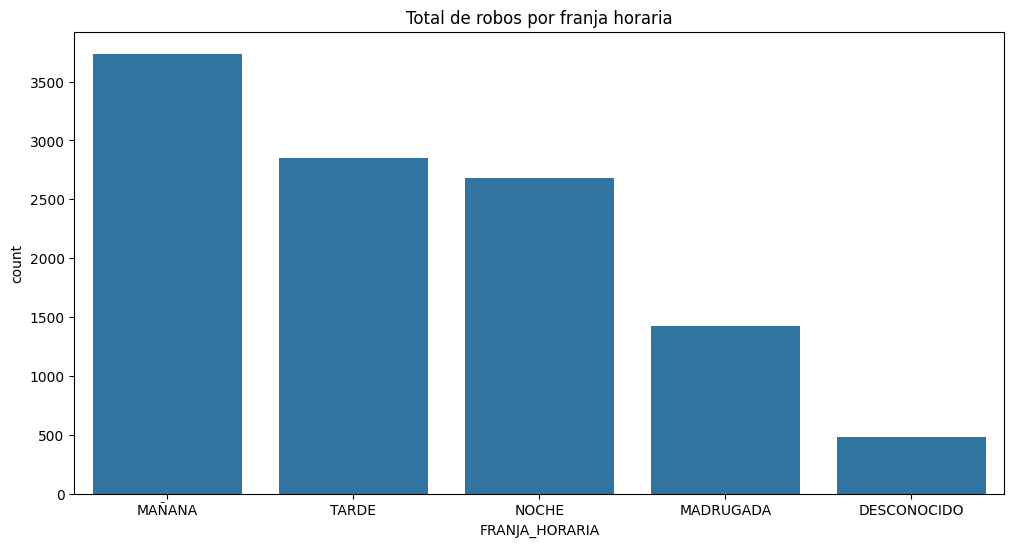

In [73]:
# Visualiza las franjas horarias con un gráfico de barras
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='FRANJA_HORARIA', order=['MAÑANA', 'TARDE', 'NOCHE', 'MADRUGADA', 'DESCONOCIDO'])
plt.title('Total de robos por franja horaria')

In [74]:
# Por FECHA, crea una columna que indique si el día es fin de semana o día laborable
def dia_laborable_o_fin_de_semana(fecha):
    if fecha.weekday() < 5:
        return 'DÍA LABORABLE'
    else:
        return 'FIN DE SEMANA'

Text(0.5, 1.0, 'Total de robos por día laborable o fin de semana y tipo')

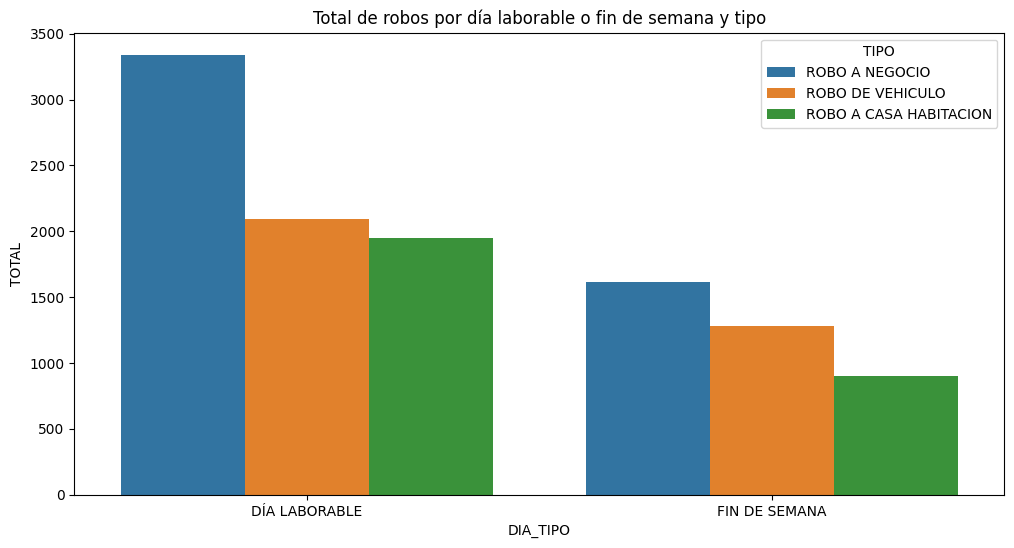

In [75]:
# Visualiza por tipo de robo y si es día laborable o fin de semana
df['DIA_TIPO'] = df['FECHA'].apply(dia_laborable_o_fin_de_semana)
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby(['DIA_TIPO', 'TIPO']).size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False), x='DIA_TIPO', y='TOTAL', hue='TIPO')
plt.title('Total de robos por día laborable o fin de semana y tipo')

---
***CHECAR***

In [76]:
# A partir de la columna FECHA, crea una columna que indique las estaciones del año: PRIMAVERA, VERANO, OTOÑO, INVIERNO
def estacion_del_año(fecha):
    mes = fecha.month
    if mes in [3, 4, 5]:
        return 'PRIMAVERA'
    elif mes in [6, 7, 8]:
        return 'VERANO'
    elif mes in [9, 10, 11]:
        return 'OTOÑO'
    else:
        return 'INVIERNO'

In [77]:
# Visualiza las estaciones del año
df['ESTACION_DEL_ANO'] = df['FECHA'].apply(estacion_del_año)
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,AÑO,MES,DIA,DIA_DE_LA_SEMANA,FRANJA_HORARIA,DIA_TIPO,ESTACION_DEL_ANO
0,3196367,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12,2024.0,1.0,1.0,Monday,DESCONOCIDO,DÍA LABORABLE,INVIERNO
1,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,2024.0,1.0,1.0,Monday,DESCONOCIDO,DÍA LABORABLE,INVIERNO
2,3196158,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35,2024.0,1.0,1.0,Monday,DESCONOCIDO,DÍA LABORABLE,INVIERNO
3,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,2024.0,1.0,1.0,Monday,DESCONOCIDO,DÍA LABORABLE,INVIERNO
4,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,2024.0,1.0,1.0,Monday,DESCONOCIDO,DÍA LABORABLE,INVIERNO


Text(0.5, 1.0, 'Total de robos por estación del año')

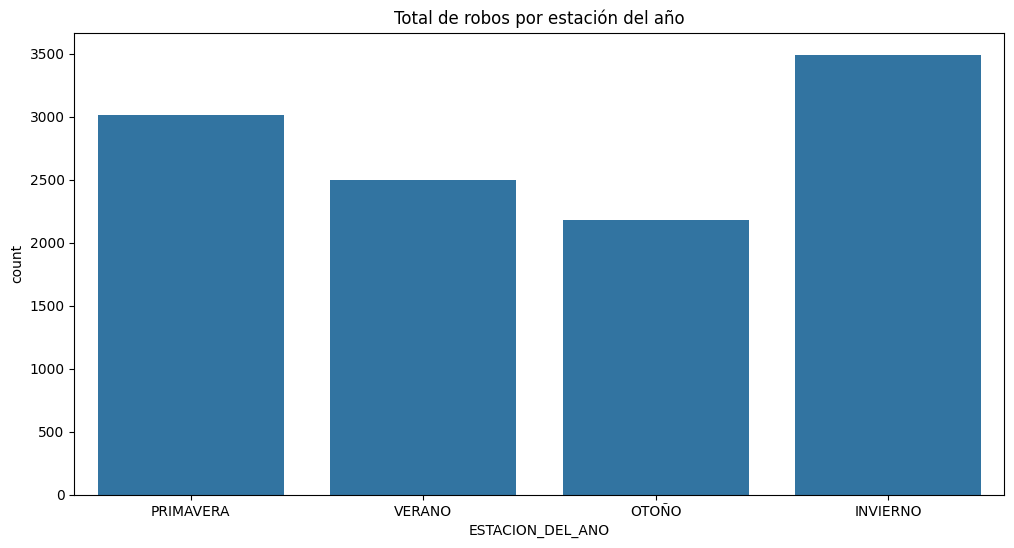

In [82]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='ESTACION_DEL_ANO', order=['PRIMAVERA', 'VERANO', 'OTOÑO', 'INVIERNO'])
plt.title('Total de robos por estación del año')
